**This notebook provide the best practices to consume covid-lake API.**

In [70]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr

In [2]:
# Plotting functions
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[ANALISE-EXPLORATORIA]/python_plotting_functions.ipynb

In [2]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
index.head(60)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease_Indicator,"SELECT createdOn, identifier, valueString, val..."
1,DREMIO,Covid-Lake,hospitalizações,"SELECT * FROM ""hospitalizacoes.csv"""
2,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,News&Trends,SELECT * FROM logical_entity
4,DREMIO,Covid-Lake,Socioeconomic_Factors,"SELECT createdOn, clean_data_to_FLOAT(valueStr..."
5,DREMIO,covidlake-raw,brasil_io,"SELECT *\nFROM ""brasil.io"""
6,DREMIO,covidlake-raw,cities,"SELECT * FROM ""Base Coordenadas Brasil.parquet"""
7,DREMIO,covidlake-raw,fiocruz_infogripe,SELECT * FROM fiocruz_infogripe
8,DREMIO,covidlake-raw,google_trends,"SELECT * FROM ""google_trends.parquet"""
9,DREMIO,covidlake-raw,health_ministry,SELECT * FROM health_ministry


In [3]:
resp = dremio.getTable(46)

In [30]:
resp.head()

,city,UF,skin_color,disease,count_in_2020,count_in_2019,created_at,__index_level_0__
0,São Paulo,SP,AMARELA,OUTRAS,27.0,35.0,2020-08-04 19:28:00,0
1,São Paulo,SP,AMARELA,COVID,1.0,NaN,2020-08-04 19:28:00,1
2,São Paulo,SP,AMARELA,INDETERMINADA,1.0,2.0,2020-08-04 19:28:00,2
3,São Paulo,SP,AMARELA,PNEUMONIA,2.0,5.0,2020-08-04 19:28:00,3
4,São Paulo,SP,AMARELA,SRAG,2.0,NaN,2020-08-04 19:28:00,4


In [5]:
resp.dtypes

city                  object
UF                    object
skin_color            object
disease               object
count_in_2020        float64
count_in_2019        float64
created_at            object
__index_level_0__      int64
dtype: object

In [64]:
resp.created_at.unique()

array(['2020-08-04 19:28:00', '2020-08-04 19:29:00',
       '2020-08-04 19:54:00', '2020-08-04 19:55:00',
       '2020-08-04 19:56:00', '2020-08-04 19:57:00',
       '2020-08-04 19:58:00', '2020-08-04 19:59:00',
       '2020-08-04 20:00:00', '2020-08-04 20:01:00',
       '2020-08-04 20:02:00', '2020-08-04 20:03:00',
       '2020-08-04 20:04:00', '2020-08-04 20:05:00',
       '2020-08-04 20:06:00', '2020-08-04 20:07:00',
       '2020-08-04 20:08:00', '2020-08-04 20:09:00',
       '2020-08-04 20:10:00', '2020-08-04 20:11:00',
       '2020-08-04 20:12:00', '2020-08-04 20:13:00',
       '2020-08-04 20:14:00', '2020-08-04 20:15:00',
       '2020-08-04 20:16:00', '2020-08-04 20:17:00',
       '2020-08-04 20:18:00', '2020-08-04 20:19:00',
       '2020-08-04 20:20:00', '2020-08-04 20:21:00',
       '2020-08-04 20:22:00', '2020-08-04 20:23:00',
       '2020-08-04 20:24:00', '2020-08-04 20:25:00',
       '2020-08-04 20:26:00', '2020-08-04 20:27:00',
       '2020-08-04 20:28:00', '2020-08-04 20:2

In [20]:
resp.describe()

,count_in_2020,count_in_2019,__index_level_0__
count,5170.000000,4733.000000,7804.000000
mean,4.150097,4.222480,0.677858
std,24.140178,24.877853,1.133198
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,3.000000,3.000000,1.000000
max,1218.000000,1241.000000,6.000000


In [23]:
resp['city'].describe()

count          7804
unique         2926
top       São Paulo
freq             28
Name: city, dtype: object

In [24]:
resp['UF'].describe()

count     7804
unique      27
top         SP
freq      1385
Name: UF, dtype: object

In [19]:
resp['skin_color'].describe()

count       7804
unique         6
top       BRANCA
freq        2521
Name: skin_color, dtype: object

In [25]:
resp.disease.describe() 

count       7804
unique         7
top       OUTRAS
freq        4527
Name: disease, dtype: object

In [27]:
resp.count_in_2020.describe() 

count    5170.000000
mean        4.150097
std        24.140178
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1218.000000
Name: count_in_2020, dtype: float64

In [28]:
resp.count_in_2019.describe() 

count    4733.000000
mean        4.222480
std        24.877853
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1241.000000
Name: count_in_2019, dtype: float64

In [32]:
resp['disease'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'PNEUMONIA', 'SRAG',
       'INSUFICIENCIA_RESPIRATORIA', 'SEPTICEMIA'], dtype=object)

In [86]:
count_mean_uf = resp.groupby("UF")["count_in_2020"].mean()
count_mean_uf.sort_values(ascending=False).head(5)

UF
MT    16.835979
AL    11.450000
CE     6.520388
AM     5.857143
RS     4.929825
Name: count_in_2020, dtype: float64

In [87]:
count_mean_uf19 = resp.groupby("UF")["count_in_2019"].mean()
count_mean_uf19.sort_values(ascending=False).head(5)

UF
MT    16.232558
AM    11.409091
AL     9.968750
DF     6.520000
RJ     5.248869
Name: count_in_2019, dtype: float64

In [68]:
city_mean_20 = resp.groupby("city")["count_in_2020"].mean()
city_mean_20.sort_values(ascending=False).head(5)

city
Cuiaba      99.280000
Maceio      98.333333
Parambu     84.000000
Riachão     46.000000
Carauari    44.000000
Name: count_in_2020, dtype: float64

In [67]:
city_mean_19 = resp.groupby("city")["count_in_2019"].mean()
city_mean_19.sort_values(ascending=False).head(5)

city
Cuiaba            352.666667
Maceio             66.500000
Carauari           55.000000
Porteiras          44.000000
Rio de Janeiro     41.750000
Name: count_in_2019, dtype: float64

#### Exploring with Graphs :)

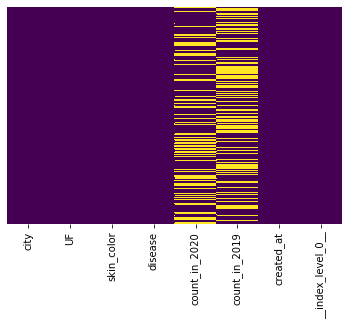

In [75]:
# Missing values
sns.heatmap(resp.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [76]:
# For more details
display(resp.isnull().sum().sort_values(ascending=False))

count_in_2019        3071
count_in_2020        2634
__index_level_0__       0
created_at              0
disease                 0
skin_color              0
UF                      0
city                    0
dtype: int64

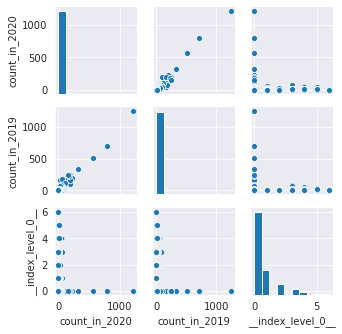

In [129]:
sns.pairplot(resp, height=1.5)

In [98]:
d_19 = resp.groupby("disease")["count_in_2019"].mean()
d_20 = resp.groupby("disease")["count_in_2020"].mean()

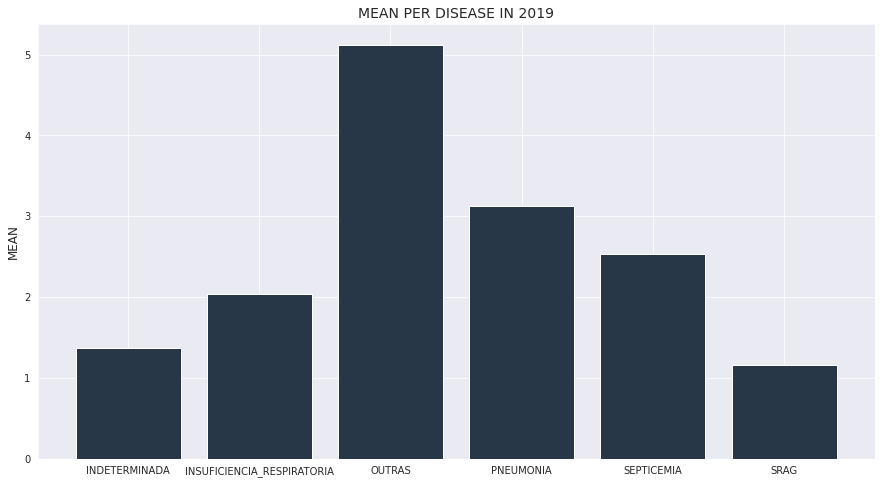

In [132]:
d19_in = d_19.index.tolist() 
d19_val = d_19.values.tolist()

ax = plt.figure(figsize=(15,8))
ax = plt.bar(d19_in, d19_val, color='#273748')

ax = plt.title("Mean per disease in 2019".upper(), fontsize=14, loc="center")

plt.ylabel("Mean".upper(), fontsize=12)

plt.show();

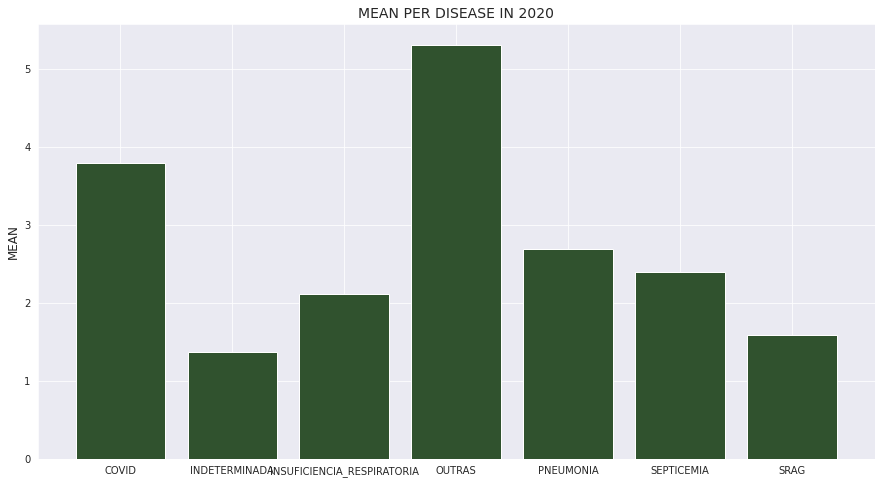

In [133]:
d20_in = d_20.index.tolist() 
d20_val = d_20.values.tolist()

ax = plt.figure(figsize=(15,8))
ax = plt.bar(d20_in, d20_val, color='#30522e')

ax = plt.title("Mean per disease in 2020".upper(), fontsize=14, loc="center")

plt.ylabel("Mean".upper(), fontsize=12)

plt.show();

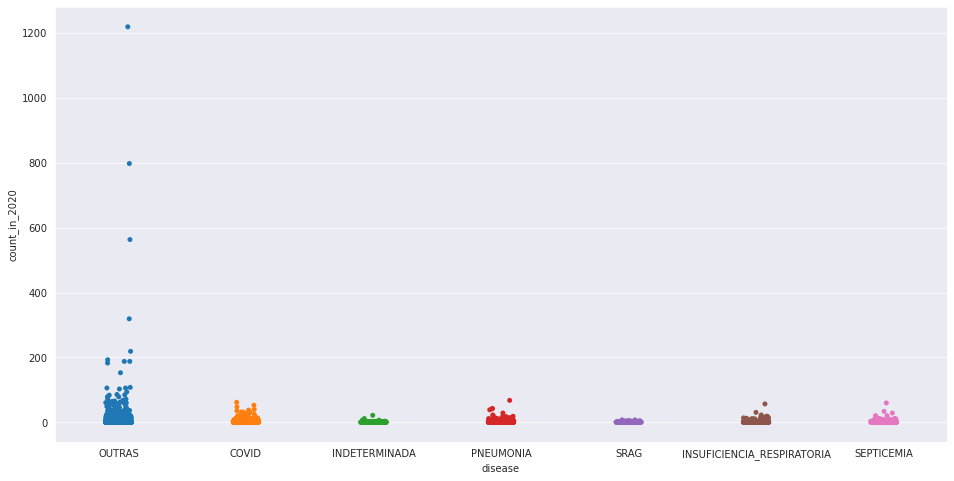

In [138]:
sns.set_style("darkgrid")
plt.subplots(1, 1, figsize=(16, 8))
sns.stripplot(x="disease", y="count_in_2020", data=resp)

### Calculating percentage between 2019 and 2020 means

In [171]:
perc = pd.DataFrame(data=d_19.index)
perc["2020_mean"] = d_20.values
perc["2019_mean"] = d_19.values
perc["perc"] =  perc.apply(lambda row: (row.iloc[1]-row.iloc[2])/row.iloc[1]*100, axis=1)
perc

,disease,2020_mean,2019_mean,perc
0,COVID,3.796339,NaN,NaN
1,INDETERMINADA,1.375635,1.366279,0.680082
2,INSUFICIENCIA_RESPIRATORIA,2.115768,2.036325,3.754838
3,OUTRAS,5.310874,5.121048,3.574295
4,PNEUMONIA,2.695312,3.129983,-16.126893
5,SEPTICEMIA,2.402469,2.528150,-5.231326
6,SRAG,1.591667,1.166667,26.701571


In [175]:
# ax = plt.figure(figsize=(15,8))
# ax = plt.bar(perc.disease, perc.perc, color='#30522e')

# ax = plt.title("decreasing and increseing of means per disease (2019-2020)".upper(), fontsize=14, loc="center")

# plt.ylabel("Mean".upper(), fontsize=12)

# plt.show();

##FINALIZAR 

#### Conclusion

## *Developed by*

 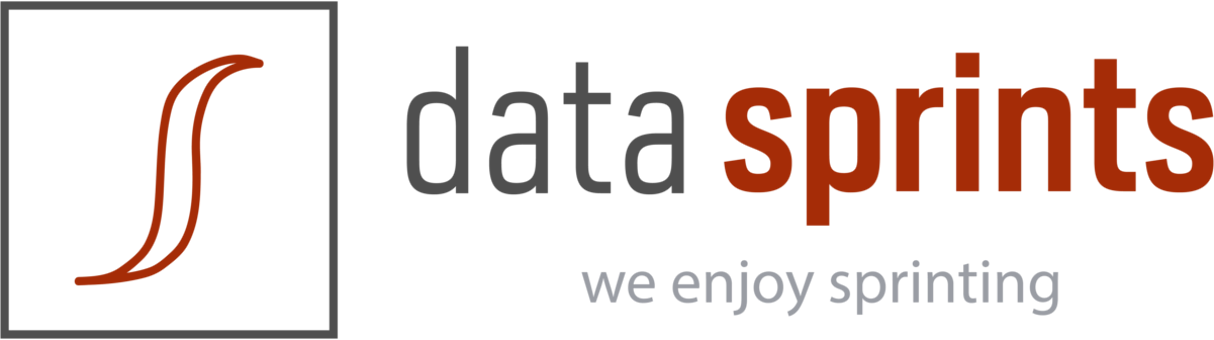